In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO

import requests

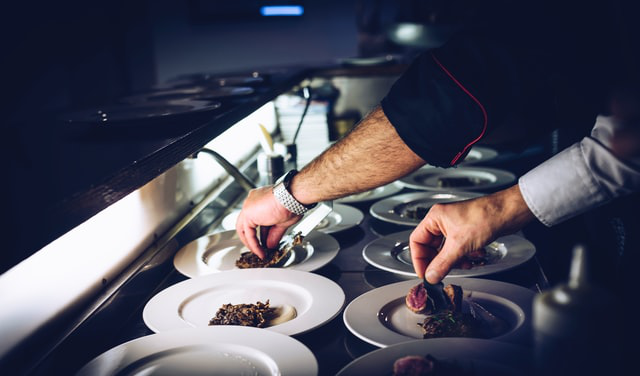

In [ ]:
url = 'https://unsplash.com/photos/boaDpmC-_Xo/download?ixid=MnwxMjA3fDB8MXxhbGx8MXx8fHx8fDJ8fDE2MzQ2ODI0MzQ&force=true&w=640'
response = requests.get(url)

image = Image.open(BytesIO(response.content)).convert()
image

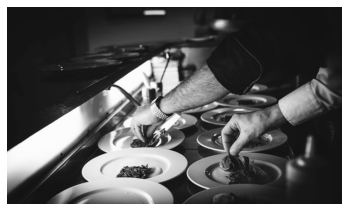

In [ ]:
img_arr = np.copy(image)
img_gray_average = np.mean(img_arr, axis=2)

plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()

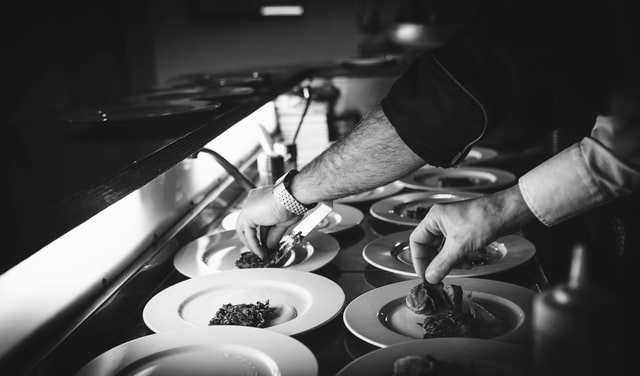

In [ ]:
new_img_gray_average = np.empty(shape=img_arr.shape, dtype=np.uint8)
new_img_gray_average[:,:,0] = img_gray_average
new_img_gray_average[:,:,1] = img_gray_average
new_img_gray_average[:,:,2] = img_gray_average

new_img_gray_average

img_res = Image.fromarray(new_img_gray_average)
img_res

#Aplicação do luminance perception
$ Y_{linear} = 0.2126R_{linear} + 0.7152G_{linear} + 0.0722B_{linear}$

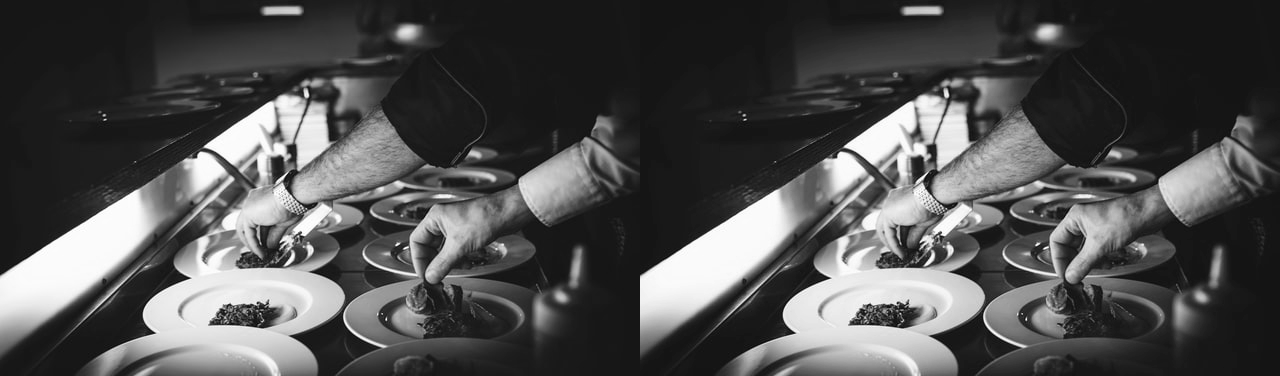

In [ ]:
pesos = [0.2126, 0.7152, 0.0722]

res = np.array(new_img_gray_average * pesos, dtype=np.uint8)
y = np.array(np.sum(res, axis=2), dtype=np.uint8)

concat = np.array(np.concatenate((img_gray_average,y), axis=1), dtype=np.uint8)

img_ones = Image.fromarray(concat)
img_ones

# Compressão $\gamma$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


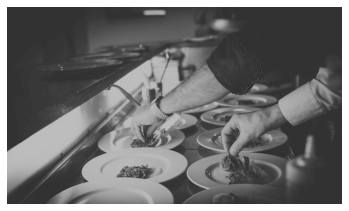

In [ ]:
i = np.asarray(luminance).copy()
y = i.copy()/255
if y[:,:,:].any() <= 0.0031308:
  y[:,:,:] = y[:,:,:] * 12.92
else:
  y[:,:,:] = ((y[:,:,:]*1.055)**(1/2.4)) - 0.055

plt.imshow(y)
plt.axis("off")
plt.show()

# Aproximação linear

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


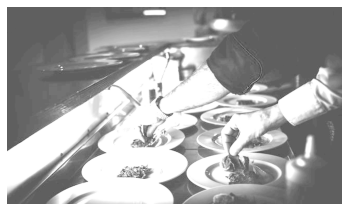

In [ ]:
i = np.asarray(y).copy()
linear = i.copy()
lin = 0.299 * linear[:,:,0] + 0.587 * linear[:,:,1] + linear[:,:,2]
linear[:,:,0] = lin
linear[:,:,1] = lin
linear[:,:,2] = lin

plt.imshow(linear)
plt.axis("off")
plt.show()